## Bibliotecas necessárias e verificar os dados

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [70]:
#Ler o arquivo
df = pd.read_csv("C:\\Users\\User\\Documents\\diabetes_prediction_dataset.csv")
#primeiras 5 linhas:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [71]:
#tamanho
df.shape

(100000, 9)

In [72]:
#características
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
#verificar se existem linhas vazias
df.isnull().values.any()

False

In [6]:
#linhas duplicadas:
print("Duplicate rows found!" if df.duplicated().any() else "No duplicate rows found.")
num_duplicates = df.duplicated().sum()
print (num_duplicates)

Duplicate rows found!
3854


In [74]:
duplicated_rows = df[df.duplicated(keep=False)]

duplicated_rows.head(30)
#como nossos não contém tantas informações, vamos assumir que as linhas duplicadas são coincidências. 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
14,Female,76.0,0,0,No Info,27.32,5.0,160,0
18,Female,42.0,0,0,No Info,27.32,5.7,80,0
41,Male,5.0,0,0,No Info,27.32,6.6,130,0
44,Female,67.0,0,0,No Info,27.32,3.5,160,0
51,Female,26.0,0,0,No Info,27.32,4.0,200,0
56,Male,30.0,0,0,No Info,27.32,6.6,140,0
62,Female,30.0,0,0,current,27.32,6.5,158,0
95,Male,19.0,0,0,never,27.32,6.1,80,0


In [8]:
other = df[df["gender"] == "Other"]
other.shape
#Como esses dados representam cerca de 0,018% do total, vamos remover-los para facilitar para o modelo depois.
df = df.drop(other.index)

## Análise das pessoas com diabetes

### -Por gênero:

In [19]:
gender_diabetes = df.groupby(["gender"])["diabetes"].sum()
gender_total = df.groupby(["gender"])["diabetes"].count()

In [20]:
gender_diabetes

gender
Female    4461
Male      4039
Name: diabetes, dtype: int64

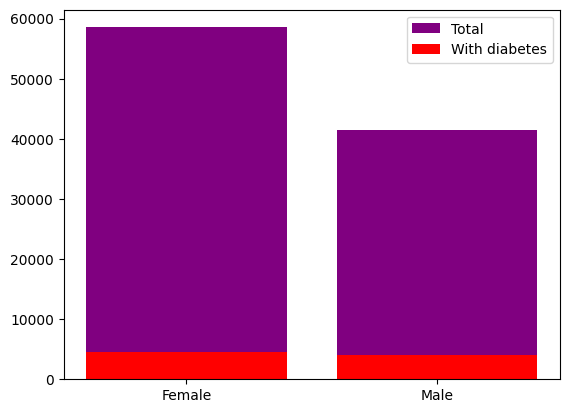

In [40]:
#visualizando:
plt.bar(gender_total.index,gender_total,label = "Total",color = "purple");
plt.bar(gender_diabetes.index,gender_diabetes,label = "With diabetes", color = "red");
plt.legend();

-  Percebemos que a quantidade é parecida, porém existem mais pessoas do gênero feminino no nossos dados, ou seja a % de  pessoas do gênero masculino é maior, essa discrepância na quantidade nos dados pode se dar pela maneira que foi feita a coleta, além de outros fatores.  

## -Por idade:

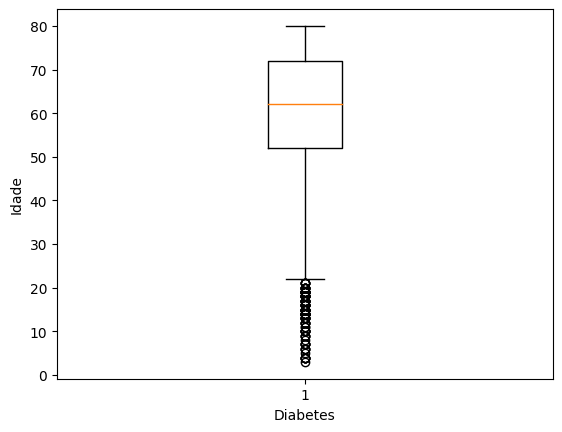

In [42]:
#Boxplot com a mediana da idade:
plt.boxplot(df[df["diabetes"] == 1]["age"]); 
plt.xlabel("Diabetes");
plt.ylabel("Idade");

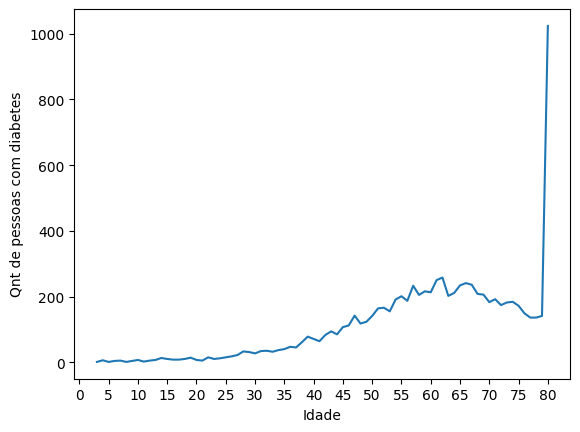

In [61]:
diabetes_count = df[df["diabetes"] == 1].groupby("age").size();

plt.plot(diabetes_count.index, diabetes_count.values); 
plt.xticks(range(0,81,5))
plt.xlabel("Idade");
plt.ylabel("Qnt de pessoas com diabetes");

# Modelo para prever se a pessoa tem diabetes:


In [62]:
#scaler para colocar os valores númericos entre 0 e 1:
scaler = MinMaxScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['blood_glucose_level'] = scaler.fit_transform(df[['blood_glucose_level']])
df['bmi'] = scaler.fit_transform(df[['bmi']])
df['HbA1c_level'] = scaler.fit_transform(df[['HbA1c_level']])

In [63]:
#transformar gênero em números:
df['gender'] = df['gender'].apply({'Male':1, 'Female':0 }.get)

In [64]:
#Dividir coluna com texto em colunas de verdadeiro e falso:
df = pd.get_dummies(df, columns=['smoking_history'])

### Dados prontos para colocar no modelo:

In [69]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,1.000000,0,1,0.177171,0.563636,0.272727,0,False,False,False,False,True,False
1,0,0.674675,0,0,0.202031,0.563636,0.000000,0,True,False,False,False,False,False
2,1,0.349349,0,0,0.202031,0.400000,0.354545,0,False,False,False,False,True,False
3,0,0.449449,0,0,0.156863,0.272727,0.340909,0,False,True,False,False,False,False
4,1,0.949950,1,1,0.118231,0.236364,0.340909,0,False,True,False,False,False,False


# Modelo: 

In [65]:
#Features/Target:
X = df.drop(["diabetes"], axis = 1 )
y = df.diabetes

In [66]:
#dividir em dados de teste e dados de treino:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
#modelo:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [68]:
#precisão:
print("Precisão :",metrics.accuracy_score(y_test, y_pred))

Precisão : 0.9631444716707506


-  Ou seja nosso modelo prevê com 96% de precisão se um paciente possui diabetes ou não oferencendo os dados da nossa tabela.